In [742]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import seaborn as sns

plt.style.use('dark_background')

In [743]:
X, y = load_iris(return_X_y=True)
X = X[:, :2]

display(X.shape, y.shape)

(150, 2)

(150,)

In [744]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

C:\Users\grayni\AppData\Local\Temp\ipykernel_7808\878800172.py:4: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train, palette=cmap_bold)


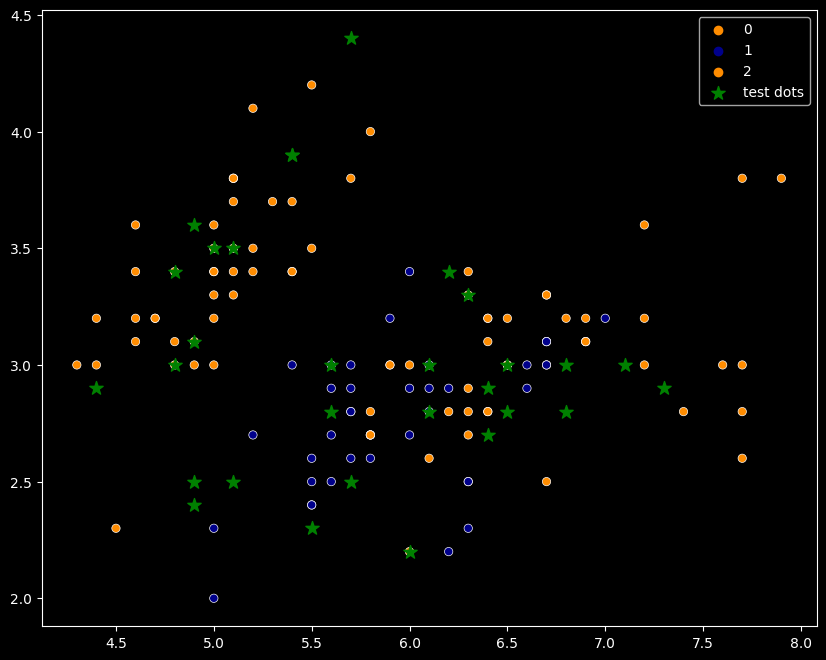

In [745]:
cmap_bold = ['darkorange', 'darkblue']

plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train, palette=cmap_bold)
plt.scatter(X_test[:, 0], X_test[:, 1], c='g', marker='*', s=100, label='test dots')
plt.legend()
plt.show()

In [746]:
def e_metrics(x1, x2):
    distance = sum(np.square(x1 - x2))
    return distance

In [747]:
def accuracy(pred, y):
    print(sum(pred == y) / len(y))

In [748]:
def w(distance, q=0.8):
    return q**distance

In [749]:
def knn(x_train, y_train, x_test, k):
    answers = []
    for j, x in enumerate(x_test):
        test_distances = []

        for i in range(len(x_train)):
            distance = e_metrics(x, x_train[i])
            weight = w(i)
            test_distances.append((distance, y_train[i], weight))

        classes_weights = {class_item: 0 for class_item in set(y_train)}

        for d in sorted(test_distances)[0:k]:
            classes_weights[d[1]] += d[2]

        answers.append(sorted(classes_weights, key=classes_weights.get)[-1])
    return answers

In [750]:
y_pred = knn(X_train, y_train, X_test, 11)

In [751]:
accuracy(y_pred, y_test)

0.7666666666666667


#### k_means

In [752]:
from sklearn.datasets import make_blobs
from matplotlib.colors import ListedColormap

In [753]:
X, y = make_blobs(n_samples=100, random_state=1)

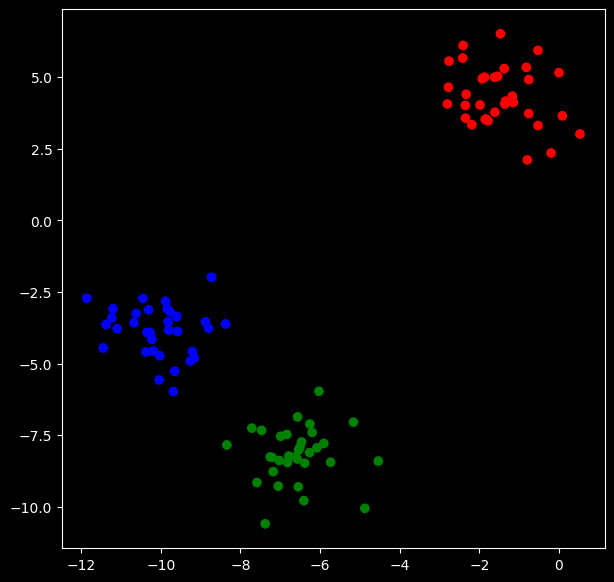

In [754]:
light_colors = ListedColormap(['red', 'blue', 'green'])

plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=light_colors)
plt.show()

In [755]:
# Euclidean distance
def e_metrics(x1 , x2):
    distance = np.sum(np.square(x1 - x2))
    return np.square(distance)

In [756]:
def kmeans(data, k, max_iterations, min_distance):
    clusters = {i: [] for i in range(k)}
    centroids = [data[i] for i in range(k)]

    for _ in range(max_iterations):
        for x in data:
            distances = [e_metrics(x, centroid) for centroid in centroids]
            cluster = distances.index(min(distances))
            clusters[cluster].append(x)

        old_centroids = centroids.copy()

        for cluster in clusters:
            centroids[cluster] = np.mean(clusters[cluster], axis=0)

        optimal = True
        for centroid in range(len(centroids)):
            if np.linalg.norm(centroids[centroid] - old_centroids[centroid], ord=2) > min_distance:
                optimal = False
                break

        if optimal:
            break

    return old_centroids, clusters

In [757]:
def visualize(centroids, clusters):
    colors = ['r', 'g', 'b', 'orange', 'yellow']
    plt.figure(figsize=(7, 7))

    for centroid in centroids:
        plt.scatter(centroid[0], centroid[1], marker='x', s=130, c='white')

    for cluster_item in clusters:
        for x in clusters[cluster_item]:
            plt.scatter(x[0], x[1], color=colors[cluster_item])

    plt.show()

In [758]:
max_iterations = 10
min_distance = 1e-4
k=3

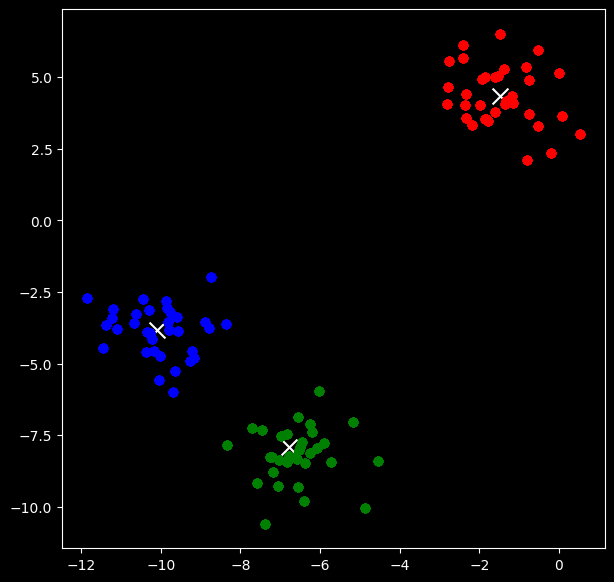

In [759]:
centroids, clusters = kmeans(X, k, max_iterations, min_distance)
visualize(centroids, clusters)

In [760]:
# Mean quadratic internal distance
def mqid(centroids, clusters):
    mean_squares = []

    for i in range(len(centroids)):
        size = len(clusters[i])
        result_ms = 0

        for cluster in clusters[i]:
            result_ms += np.linalg.norm(cluster - centroids[i], ord=2)

        mean_squares.append(result_ms / size)

    return sum(mean_squares)

In [769]:
max_iterations = 5
result_metrics = []
for k in range(1, 11):
    centroids, clusters = kmeans(X, k, max_iterations, min_distance)
    result_metrics.append([k, mqid(centroids, clusters)])

result_metrics = np.array(result_metrics)

[[ 1.          6.15125174]
 [ 2.          4.07428477]
 [ 3.          3.77835066]
 [ 4.          3.92938063]
 [ 5.          4.32796633]
 [ 6.          5.04175597]
 [ 7.          5.49219223]
 [ 8.          5.99505958]
 [ 9.          6.67694969]
 [10.          7.22025385]]


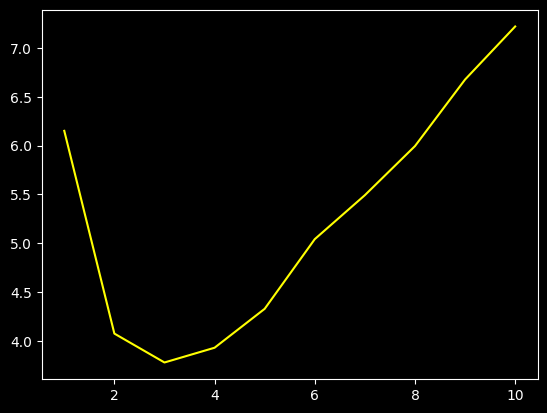

In [770]:
print(result_metrics)
plt.plot(result_metrics[:, 0], result_metrics[:, 1], c='yellow')
plt.show()